<a href="https://colab.research.google.com/github/Axel02leon/Intro-to-Machine-Learning-/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 6

## Problem 1a, 1b

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time

url = "https://raw.githubusercontent.com/Axel02leon/Intro-to-Machine-Learning-/refs/heads/main/Homework_2/Housing.csv"
data = pd.read_csv(url)


In [ ]:
data = pd.get_dummies(data, drop_first=True)
X = data.drop(columns=['price'])
y = np.log1p(data['price'])  # Log transform the target

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_a.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Train the model
start_time = time.time()
history_a = model_a.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=1,
    callbacks=[early_stopping]
)
end_time = time.time()

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 23765532540928.0000 - mae: 4578991.5000 - val_loss: 30129982013440.0000 - val_mae: 5007535.5000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26130497142784.0000 - mae: 4770417.0000 - val_loss: 30129977819136.0000 - val_mae: 5007535.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24963476094976.0000 - mae: 4672380.0000 - val_loss: 30129975721984.0000 - val_mae: 5007535.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26449799020544.0000 - mae: 4819650.5000 - val_loss: 30129971527680.0000 - val_mae: 5007534.5000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25844697268224.0000 - mae: 4733023.5000 - val_loss: 30129967333376.0000 - val_mae: 5007534.5000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23689607249920.0000 - mae: 4567670.5000 - val_loss: 30129963139072.0000 - val_mae: 5007534.0000
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2597712193

In [ ]:
# Report results
print("Task (a):")
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Final Training Loss: {history_a.history['loss'][-1]:.4f}")
print(f"Validation MAE: {history_a.history['val_mae'][-1]:.4f}")

Task (a):
Training Time: 18.40 seconds
Final Training Loss: 25232484073472.0000
Validation MAE: 5007328.5000


In [ ]:
# Task (b): Model with Three Hidden Layers
model_b = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model_b.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
start_time = time.time()
history_b = model_b.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)
end_time = time.time()


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8372 - mae: 0.8237 - val_loss: 0.5290 - val_mae: 0.6234
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4723 - mae: 0.5929 - val_loss: 0.3270 - val_mae: 0.4916
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2708 - mae: 0.4430 - val_loss: 0.2142 - val_mae: 0.3745
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1695 - mae: 0.3347 - val_loss: 0.1773 - val_mae: 0.3251
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1395 - mae: 0.2948 - val_loss: 0.1518 - val_mae: 0.3020
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1218 - mae: 0.2757 - val_loss: 0.1320 - val_mae: 0.2850
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1041 - mae: 0.2559 - val_loss: 0.1163 - val_mae: 0.2675
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0940 - mae: 0.2406 - val_loss: 0.1019 - val_mae: 0.2474
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.08

In [ ]:
# Report results for Task (b)
print("Task (b):")
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Final Training Loss: {history_b.history['loss'][-1]:.4f}")
print(f"Validation MAE: {history_b.history['val_mae'][-1]:.4f}")


Task (b):
Training Time: 15.92 seconds
Final Training Loss: 0.0056
Validation MAE: 0.0761


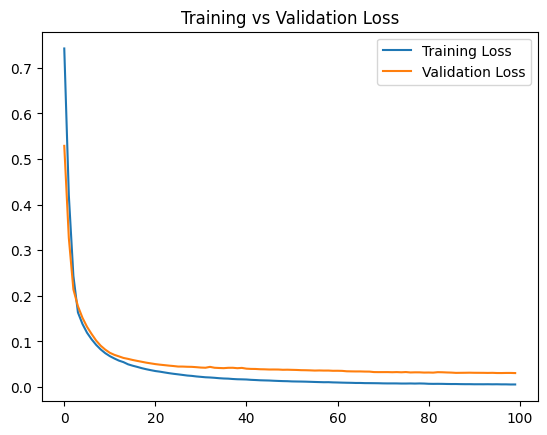

In [ ]:
# Analyze overfitting (Optional)
import matplotlib.pyplot as plt
plt.plot(history_b.history['loss'], label='Training Loss')
plt.plot(history_b.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

## Problem 2

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
import matplotlib.pyplot as plt


In [ ]:
# Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
# Preprocess Data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalize the data

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Task (a): Model with One Hidden Layer
model_a = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()
history_a = model_a.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)
end_time = time.time()

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7533 - loss: 0.5232 - val_accuracy: 0.9211 - val_loss: 0.3662
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9020 - loss: 0.3505 - val_accuracy: 0.9298 - val_loss: 0.2663
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 0.2715 - val_accuracy: 0.9474 - val_loss: 0.2115
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9631 - loss: 0.2137 - val_accuracy: 0.9649 - val_loss: 0.1781
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9506 - loss: 0.2016 - val_accuracy: 0.9737 - val_loss: 0.1548
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9543 - loss: 0.1727 - val_accuracy: 0.9737 - val_loss: 0.1380
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9559 - loss: 0.1612 - val_accuracy: 0.9737 - val_loss: 0.1246
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.1372 - val_accuracy: 0.9737 - 

In [ ]:
# Report results for Task (a)
print("Task (a):")
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Final Training Loss: {history_a.history['loss'][-1]:.4f}")
print(f"Validation Accuracy: {history_a.history['val_accuracy'][-1]:.4f}")

Task (a):
Training Time: 13.99 seconds
Final Training Loss: 0.0046
Validation Accuracy: 0.9737


In [ ]:
# Task (b): Model with Three Hidden Layers
model_b = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()
history_b = model_b.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)
end_time = time.time()

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8134 - loss: 0.5773 - val_accuracy: 0.9825 - val_loss: 0.3056
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9379 - loss: 0.2936 - val_accuracy: 0.9737 - val_loss: 0.1163
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9480 - loss: 0.1469 - val_accuracy: 0.9825 - val_loss: 0.0714
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.0820 - val_accuracy: 0.9737 - val_loss: 0.0667
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9652 - loss: 0.0843 - val_accuracy: 0.9737 - val_loss: 0.0629
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9896 - loss: 0.0591 - val_accuracy: 0.9737 - val_loss: 0.0581
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.0456 - val_accuracy: 0.9737 - val_loss: 0.0605
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.0679 - val_accuracy: 0.9737 - 

In [ ]:
# Report results for Task (b)
print("Task (b):")
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Final Training Loss: {history_b.history['loss'][-1]:.4f}")
print(f"Validation Accuracy: {history_b.history['val_accuracy'][-1]:.4f}")

Task (b):
Training Time: 20.22 seconds
Final Training Loss: 0.0001
Validation Accuracy: 0.9561


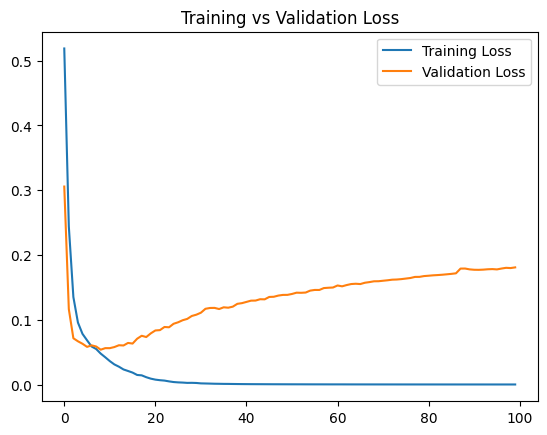

In [ ]:
# Analyze overfitting (Optional)
plt.plot(history_b.history['loss'], label='Training Loss')
plt.plot(history_b.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Problem 3a

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, f1_score
import time

In [ ]:
# Load CIFAR-10 data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Define the neural network architecture
class SimpleFCNN(nn.Module):
    def __init__(self):
        super(SimpleFCNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)  # 32x32x3 images flattened
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)  # 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Initialize the model, loss function, and optimizer
model = SimpleFCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model for 100 epochs
num_epochs = 100
start_time = time.time()


In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(trainloader)
    accuracy = 100 * correct / total

    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [10/100], Loss: 0.9998, Accuracy: 65.44%
Epoch [20/100], Loss: 0.6832, Accuracy: 76.76%
Epoch [30/100], Loss: 0.4909, Accuracy: 83.71%
Epoch [40/100], Loss: 0.3784, Accuracy: 87.66%
Epoch [50/100], Loss: 0.3047, Accuracy: 90.10%
Epoch [60/100], Loss: 0.2665, Accuracy: 91.63%
Epoch [70/100], Loss: 0.2201, Accuracy: 93.26%
Epoch [80/100], Loss: 0.2068, Accuracy: 93.81%
Epoch [90/100], Loss: 0.1770, Accuracy: 94.61%
Epoch [100/100], Loss: 0.1798, Accuracy: 94.89%


In [ ]:
# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
training_time = time.time() - start_time

print(f"Training time: {training_time:.2f} seconds")
print(f"Test Accuracy after 100 epochs: {test_accuracy:.2f}%")

Training time: 9880.92 seconds
Test Accuracy after 100 epochs: 51.81%


## Problem 3b


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# Load CIFAR-10 dataset to calculate mean and std
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
imgs = torch.stack([img_t for img_t, _ in train_dataset], dim=3)
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

Files already downloaded and verified


In [ ]:
# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Define the extended model with three hidden layers
class CIFAR10ExtendedNN(nn.Module):
    def __init__(self):
        super(CIFAR10ExtendedNN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)  # Input to Hidden Layer 1
        self.fc2 = nn.Linear(512, 256)         # Hidden Layer 1 to Hidden Layer 2
        self.fc3 = nn.Linear(256, 128)         # Hidden Layer 2 to Hidden Layer 3
        self.fc4 = nn.Linear(128, 10)          # Hidden Layer 3 to Output Layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)         # Dropout for regularization

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten input
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

In [ ]:

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CIFAR10ExtendedNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



start_time = time.time()
num_epochs = 100
train_losses = []
val_accuracies = []


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)


    # Print the loss after each epoch
    if (epoch+1) % 10 == 0:  # Display every 10th epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [10/100], Loss: 1.7067
Epoch [20/100], Loss: 1.6368
Epoch [30/100], Loss: 1.6200
Epoch [40/100], Loss: 1.5819
Epoch [50/100], Loss: 1.5570
Epoch [60/100], Loss: 1.5273
Epoch [70/100], Loss: 1.5082
Epoch [80/100], Loss: 1.4938
Epoch [90/100], Loss: 1.4683
Epoch [100/100], Loss: 1.4568


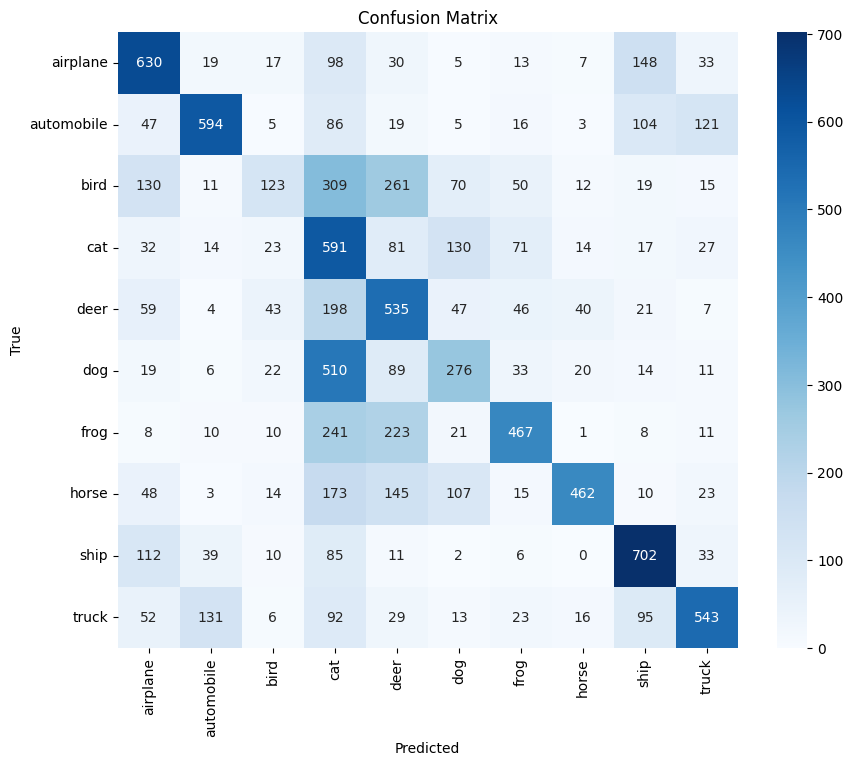

Training Time: 4287.25 seconds
Test Accuracy: 49.23%
F1 Score (Macro Average): 0.4928
Confusion Matrix:
[[630  19  17  98  30   5  13   7 148  33]
 [ 47 594   5  86  19   5  16   3 104 121]
 [130  11 123 309 261  70  50  12  19  15]
 [ 32  14  23 591  81 130  71  14  17  27]
 [ 59   4  43 198 535  47  46  40  21   7]
 [ 19   6  22 510  89 276  33  20  14  11]
 [  8  10  10 241 223  21 467   1   8  11]
 [ 48   3  14 173 145 107  15 462  10  23]
 [112  39  10  85  11   2   6   0 702  33]
 [ 52 131   6  92  29  13  23  16  95 543]]


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store labels and predictions for F1 score and confusion matrix
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

accuracy = 100 * correct / total

# Calculate the F1 score (Macro average F1 score)
f1 = f1_score(all_labels, all_preds, average='macro')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

end_time = time.time()

# Report the results
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Test Accuracy: {accuracy:.2f}%")
print(f"F1 Score (Macro Average): {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")